In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = 'data.json'

def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
        
        
    # convert lists into numpy arrays
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])
    
    return inputs,targets

def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history['accuracy'], label='train accuracy')
    axs[0].plot(history.history['val_accuracy'], label='test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title('Accuracy eval')
    
    # create error subplot
    axs[0].plot(history.history['loss'], label='train error')
    axs[0].plot(history.history['val_loss'], label='test error')
    axs[0].set_ylabel('Error')
    axs[0].legend(loc='upper right')
    axs[0].set_title('Error eval')
    
    plt.show()

if __name__ == '__main__':
    
    # load data
    inputs, targets = load_data(DATASET_PATH)

    # split the data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                              targets, 
                                                                              test_size=0.3)
    
    # build the network arch
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), # input start from 1 because its 3 dimensi
        
        # 1st hidden layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), # rectified linear unit
        keras.layers.Dropout(0.3),
        
        # 2nd hidden layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd hidden layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # compile network
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    
    # ------------------------------------------------------------------------------------
    # train network
    history = model.fit(inputs_train, targets_train, 
              validation_data=(inputs_test, targets_test),
              epochs=100,
              batch_size=32)
    
    # plot accuracy and error over the epochs
    plot_history(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

219/219 [==============================] - 4s 20ms/step - loss: 2.4660 - accuracy: 0.3179 - val_loss: 2.4322 - val_accuracy: 0.3495
Epoch 48/100
219/219 [==============================] - 5s 21ms/step - loss: 2.4284 - accuracy: 0.3349 - val_loss: 2.3823 - val_accuracy: 0.3578
Epoch 49/100
219/219 [==============================] - 5s 21ms/step - loss: 2.4151 - accuracy: 0.3336 - val_loss: 2.3912 - val_accuracy: 0.3571
Epoch 50/100
219/219 [==============================] - 5s 21ms/step - loss: 2.3867 - accuracy: 0.3382 - val_loss: 2.4178 - val_accuracy: 0.3505
Epoch 51/100
219/219 [==============================] - 4s 20ms/step - loss: 2.3453 - accuracy: 0.3499 - val_loss: 2.3568 - val_accuracy: 0.3585
Epoch 52/100
219/219 [==============================] - 5s 21ms/step - loss: 2.3211 - accuracy: 0.3511 - val_loss: 2.2993 - val_accuracy: 0.3925
Epoch 53/100
219/219 [==============================] - 4s 20ms/step - loss: 2.3097 - accuracy: 0.3585 - val_loss: 2.2743 - val_accuracy: 0.382

<Figure size 640x480 with 2 Axes>

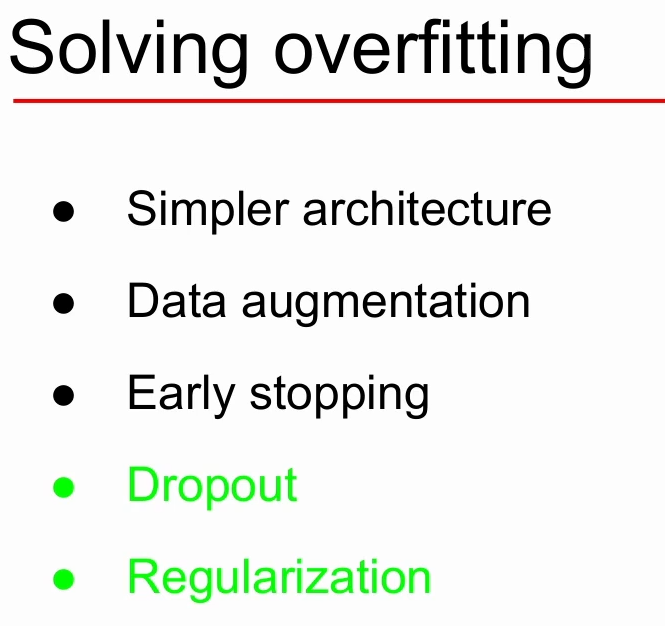

- Dropout --> Randomly drop neurons while training
            - Increased network robustness
            - Dropout probability --> 0.1-0.5

- Regularization --> Add penalty to error function
                    - Punish large weights
                    - L1 and L2

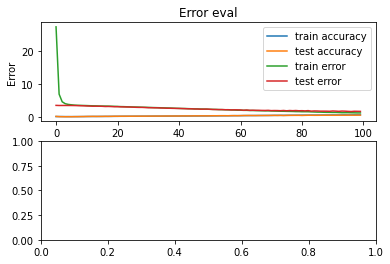

In [3]:
plot_history(history)